# **Usage Example**

A brief overview of how to use synthetic data for small area estimation and mapping. As illustrative examples, we map the percentage of non-Hispanic White females aged 18 to 64 who live in households.

## Ohio

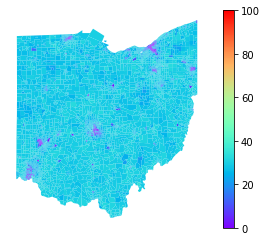

In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

filename_data = 'data/demo_data/OH_microdata.csv'
oh_data = pd.read_csv(filename_data)
col_names = ['BLKGRPA', 'HTYPE', 'AGE', 'ETHN', 'RACE', 'SEX']
t = oh_data.groupby(col_names).size()
p = oh_data.groupby('BLKGRPA').size()
geoids = [*set(oh_data['BLKGRPA'].to_list())]
geoids.sort()

df = pd.DataFrame(0, index=range(len(geoids)), columns=['CNT', 'TOTAL_CNT'])
df.index = geoids
for id in geoids:
    # number of non-Hispanic White females aged 18 to 64 years who live in households
    try:
        cnt = t.loc[(id, 1, 2, 1, 1, 2)]
        total_cnt = p.loc[id]
    except:
        cnt = 0
    df.at[id, 'CNT'] = cnt
    df.at[id, 'TOTAL_CNT'] = total_cnt
df['PCT'] = df['CNT'] / df['TOTAL_CNT'] * 100

filename_gdf = 'data/demo_data/tl_2010_39_bg10.shp'
gdf_oh = gpd.read_file(filename_gdf)
gdf_oh = gdf_oh.set_index('GEOID10')
gdf_oh = gdf_oh.sort_index()
gdf_oh.index = gdf_oh.index.astype('int64')
gdf_oh.index.name = None
gdf_oh = gdf_oh.join(df)

fig = gdf_oh.plot(column='PCT', cmap='rainbow', legend=True, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('oh.eps')

## Washington

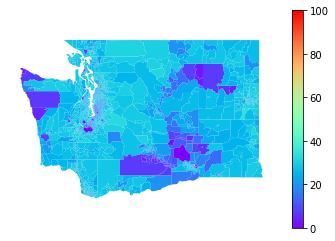

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

filename_data = 'data/demo_data/WA_microdata.csv'
wa_data = pd.read_csv(filename_data)
col_names = ['BLKGRPA', 'HTYPE', 'AGE', 'ETHN', 'RACE', 'SEX']
t = wa_data.groupby(col_names).size()
p = wa_data.groupby('BLKGRPA').size()
geoids = [*set(wa_data['BLKGRPA'].to_list())]
geoids.sort()

df = pd.DataFrame(0, index=range(len(geoids)), columns=['CNT', 'TOTAL_CNT'])
df.index = geoids
for id in geoids:
    # number of non-Hispanic White females aged 65 and above who live in households
    try:
        cnt = t.loc[(id, 1, 2, 1, 1, 2)]
        total_cnt = p.loc[id]
    except:
        cnt = 0
    df.at[id, 'CNT'] = cnt
    df.at[id, 'TOTAL_CNT'] = total_cnt
df['PCT'] = df['CNT'] / df['TOTAL_CNT'] * 100

filename_gdf = 'data/demo_data/tl_2010_53_bg10.shp'
gdf_wa = gpd.read_file(filename_gdf)
gdf_wa = gdf_wa.set_index('GEOID10')
gdf_wa = gdf_wa.sort_index()
gdf_wa.index = gdf_wa.index.astype('int64')
gdf_wa.index.name = None
gdf_wa = gdf_wa.join(df)

fig = gdf_wa.plot(column='PCT', cmap='rainbow', legend=True, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('wa.eps')